In [1]:

#importing libraries 

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
df = pd.read_csv('/content/project_data.csv',na_values='?')
df.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No null values so no need to handle missing values

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.shape

(2111, 17)

**Encoding**

In [8]:
feature_obj = [
   "Gender",
   "family_history_with_overweight",
   "FAVC",
   "CAEC",
   "SMOKE",
   "SCC",  
   "CALC",
   "MTRANS",
   "NObeyesdad"
]

In [9]:
df_obj = df.select_dtypes(include=['object'].copy())


In [10]:

for i in df_obj.columns:
    df.loc[:, i] = pd.Categorical(df[i]).codes
df.head(5)

<ipython-input-10-690b32aa6760>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, i] = pd.Categorical(df[i]).codes
<ipython-input-10-690b32aa6760>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, i] = pd.Categorical(df[i]).codes
<ipython-input-10-690b32aa6760>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, ne

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


Splitting data into feature matrix and target vector

In [11]:
#Feature matrix
X=df.drop("NObeyesdad",axis=1)
X.shape

(2111, 16)

In [12]:
#Target vector
y=pd.DataFrame(df["NObeyesdad"])
y.shape

(2111, 1)

No dimensionality reduction needed

Splitting data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Scaling using min-max scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression Model

Mean squared error: 2.72
R-squared: 0.26


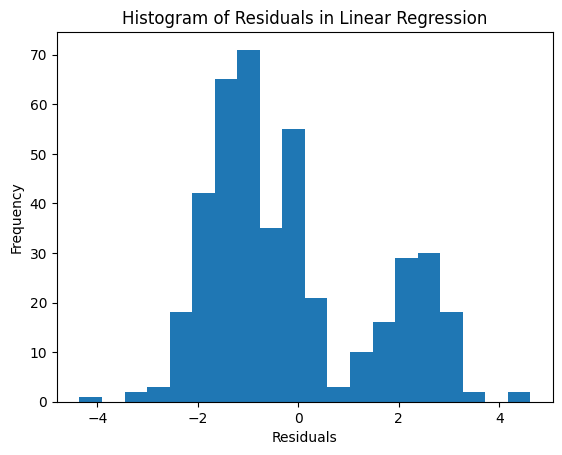

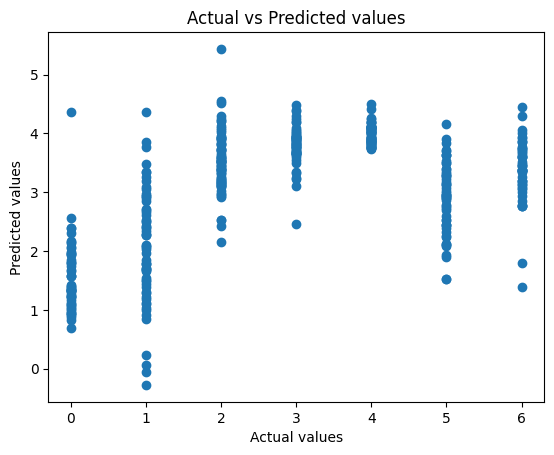

In [17]:
# Create linear regression model and train it on the training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def get_regressor_mse(model, X, y):

   X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
   model.fit(X_train,y_train)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

residuals = y_test - y_pred

plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals in Linear Regression")
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()
  

Logistic Regression Model

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8747044917257684
Confusion matrix:
 [[56  0  0  0  0  0  0]
 [11 39  0  0  0  8  4]
 [ 0  0 70  7  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 44  8]
 [ 0  0  3  0  0  5 42]]


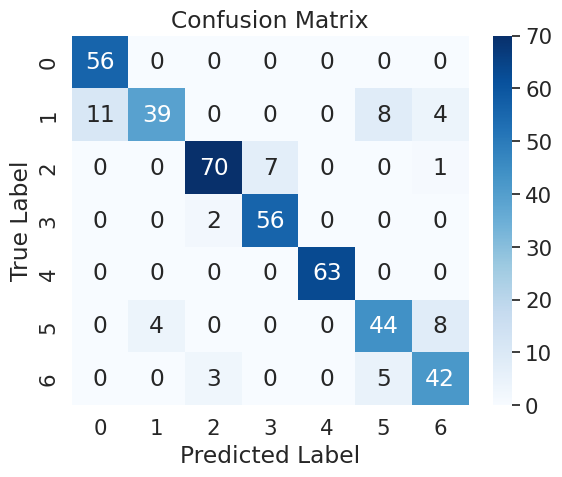

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42, multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", conf_matrix)
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Ridge Regression Model

Mean squared error: 2.7232669806425904
Accuracy: 0.26262161088805647


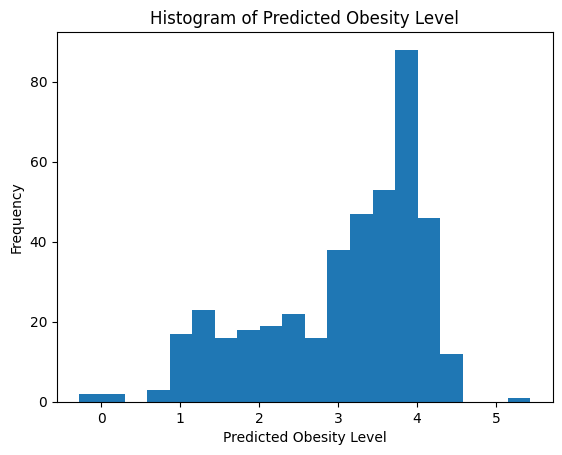

In [18]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Ridge regression model
try:
    model = Ridge(alpha=1.0, fit_intercept=True)
    model.fit(X_train, y_train)
except ValueError as e:
    print("Error: ", e)

# Make predictions on the test set
try:
    y_pred = model.predict(X_test)
except NameError as e:
    print("Error: ", e)

# Evaluate the model using mean squared error
try:
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error:", mse)
except NameError as e:
    print("Error: ", e)
# calculate the R-squared value of the predictions
accuracy = r2_score(y_test, y_pred)

# print the accuracy
print("Accuracy:", accuracy)

# Generate predicted values
y_pred = model.predict(X_test)

# Plot a histogram of the predicted values
plt.hist(y_pred, bins=20)
plt.xlabel('Predicted Obesity Level')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Obesity Level')
plt.show()

KNN Model

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.98      0.95        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68      0.75        56
           6       0.73      0.76      0.75        50

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



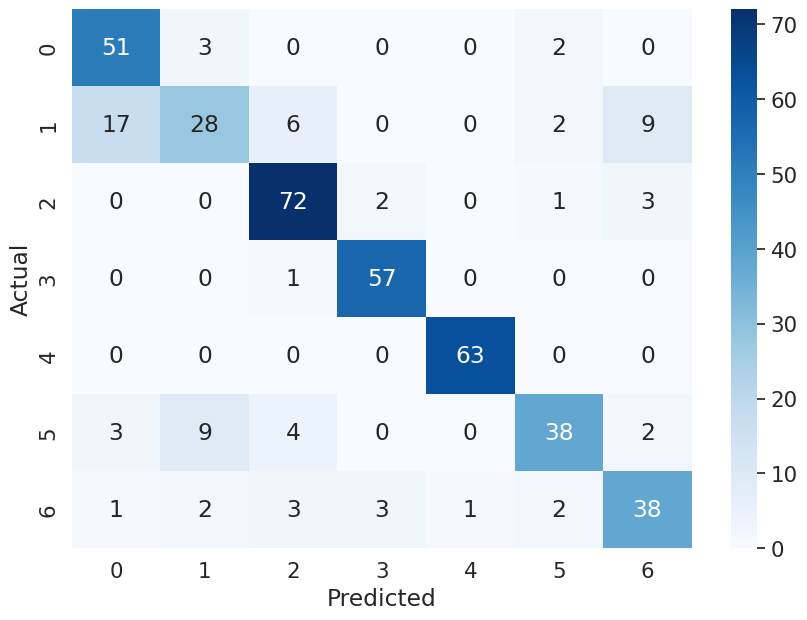

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification report
report = classification_report(y_test, y_pred)
print(report)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Neural Network Model

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/project_data.csv')

# Convert the categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight',
                                 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE',
                                 'SCC', 'CALC', 'MTRANS'])

# Split the dataset into input features and target variable
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history= model.fit(X_train, pd.get_dummies(y_train), epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, pd.get_dummies(y_test))
print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(history.history)



Epoch 1/100
48/48 [==============================] - 3s 24ms/step - loss: 1.8932 - accuracy: 0.3259 - val_loss: 1.7246 - val_accuracy: 0.4024
Epoch 2/100
48/48 [==============================] - 1s 11ms/step - loss: 1.1580 - accuracy: 0.6280 - val_loss: 1.4567 - val_accuracy: 0.4260
Epoch 3/100
48/48 [==============================] - 1s 18ms/step - loss: 0.7546 - accuracy: 0.7887 - val_loss: 1.3465 - val_accuracy: 0.4793
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 0.5614 - accuracy: 0.8348 - val_loss: 1.3088 - val_accuracy: 0.4793
Epoch 5/100
48/48 [==============================] - 1s 16ms/step - loss: 0.4722 - accuracy: 0.8512 - val_loss: 1.2959 - val_accuracy: 0.4852
Epoch 6/100
48/48 [==============================] - 1s 17ms/step - loss: 0.4146 - accuracy: 0.8637 - val_loss: 1.2806 - val_accuracy: 0.5089
Epoch 7/100
48/48 [==============================] - 1s 17ms/step - loss: 0.3771 - accuracy: 0.8657 - val_loss: 1.2883 - val_accuracy: 0.4852
Epoch 

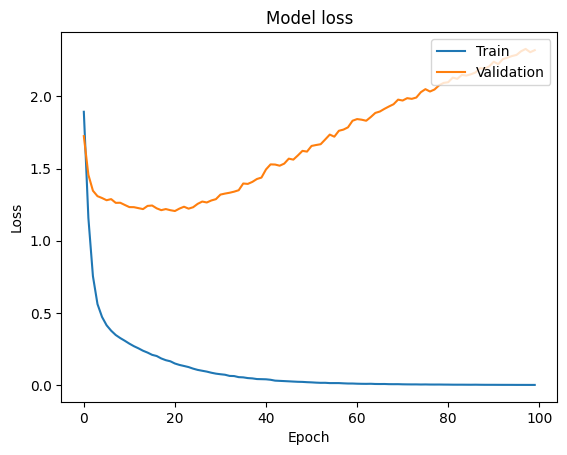

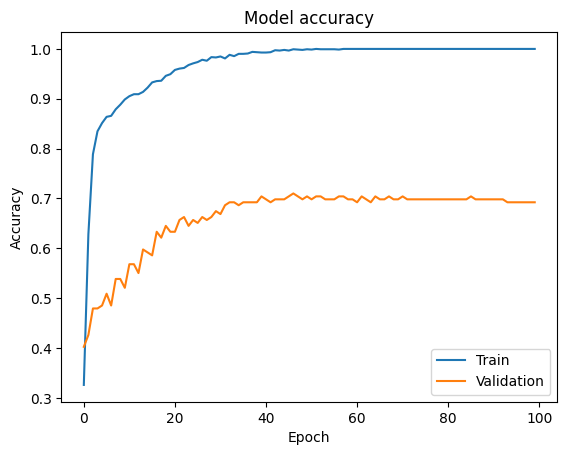

In [43]:
# Get the training history
from keras.utils.vis_utils import plot_model

#print(model.history.history)
# Plot the loss curve
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

